# geographic plots of Alaska
### created by Shihao Yuan
### modified by D. Li

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pygmt
import pandas as pd

%matplotlib notebook

# pygmt.show_versions()

In [4]:
#savefig.format:    png         # {png, ps, pdf, svg}
#savefig.dpi:       figure      # figure dots per inch or 'figure'

# choose earth model resolution "01m","30s","01s", etc
# topo_data = '@earth_relief_01s'

mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['legend.title_fontsize'] = 'x-large'
mpl.rcParams['figure.figsize'] = 6.4, 4.8

mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.linestyle'] = '-'
mpl.rcParams['savefig.format'] = 'png'
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['savefig.transparent'] = False


In [308]:
# download activate fault model https://catalogue.data.govt.nz/dataset/new-zealand-active-fault-model/resource/16e96ab4-9b5b-4932-8f9e-e1bf166117a8 

import geopandas as gpd
import os

faultShp = os.path.join("/Users/duoli/Documents/NSHM_SRM/NSHM_SRM_model/NZ_CFM_v1_0_shapefile/","NZ_CFM_v1_0.shp")
gdf = gpd.read_file(faultShp,include_fields=["Name", "Geometry"])
gdf.keys()
gdf["geometry"]  = gpd.GeoSeries.to_crs(gdf["geometry"],crs="EPSG:4326")

# for fault_name in gdf["Name"][:]:
#     print(fault_name,file=open('fault_names.txt', 'a'))


In [309]:
# select fault name
# gdf_well = gpd.read_file(faultShp, include_fields=["Name", "Geometry"],
#                          mask = gdf[gdf["Name"].str.startswith("Wellington Hutt Valley")],
#                         )

values = ['Wellington Hutt Valley: 1',
          'Wellington Hutt Valley: 2',
          'Wellington Hutt Valley: 3',
          'Wellington Hutt Valley: 4',
          'Wellington Hutt Valley: 5',
          "Wellington: Tararua 1",
          "Wellington: Tararua 2",
          "Wellington: Tararua 3",
          "Wellington: Pahiatua",
          'Aotea - Evans Bay']
gdf_well2 = gdf.query('Name in @values')


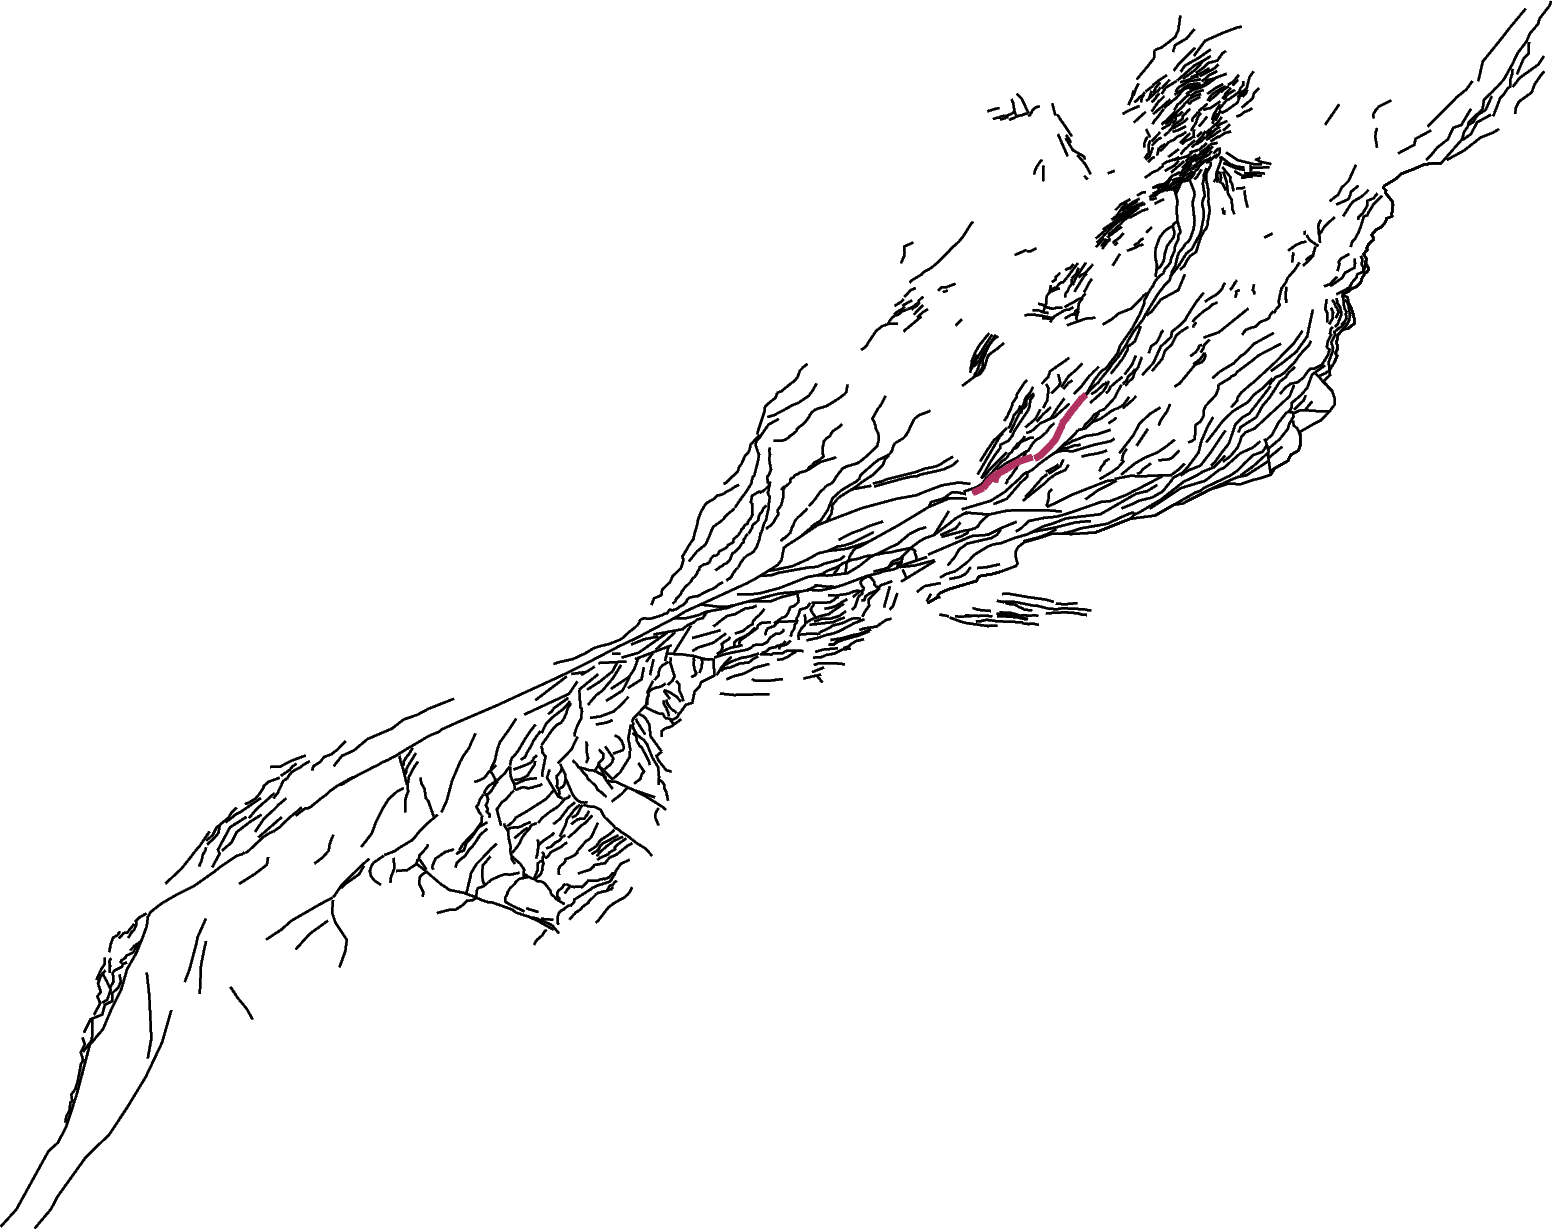

In [314]:
# fault_set =[]
# fault_set.append(gdf[gdf["Name"]=="Hope: Taramakau"])
# fault_set.append(gdf[gdf["Name"]=="Hope: Hope River"])
# fault_set.append(gdf[gdf["Name"]=="Ohariu"])
# fault_set.append(gdf[gdf["Name"]=="Evans Bay"])

# print(fault_set)
fig1 = pygmt.Figure()

fig1.plot(data=gdf,pen='0.50p,black')
fig1.plot(data=gdf_well2,pen='1.5p,maroon')

# # fig1.basemap(region=region_map, projection="M9c", frame="afg")
# for fault_id in gdf_well:
#     print(fault_id)
#     fig1.plot(data=fault_id, color='red')

fig1.show()

outname = "activate-fault-wellington.png"
fig1.savefig(outname)

In [207]:
domainShp = os.path.join("/Users/duoli/Documents/NSHM_SRM/NSHM_SRM_model/NZ_CFM_v1_0_TectonicDomains/","NZ_CFM_v1_0_TectonicDomains.shp")
gd_dom = gpd.read_file(domainShp)
gd_dom.keys()

gd_dom["geometry"] = gpd.GeoSeries.to_crs(gd_dom["geometry"],crs="EPSG:4326")


In [5]:
# Focal mechanisms - 2016 Kaikoura

# data from USGS: https://earthquake.usgs.gov/earthquakes/eventpage/us1000778i/region-info

focal_mechanism = dict(strike=219, dip=38, rake=128, magnitude=7.8)
locat = np.asarray([-42.737, 173.054])

lon= np.asarray([])
lat= np.asarray([])

# pygmt.datasets.load_earth_relief()
# grid = pygmt.datasets.load_earth_relief(resolution="10m",region=region_map)
# print(grid.shape)


pygmt.makecpt(
    cmap='topo',
    series='-8000/8000/1000',
    continuous=True
)


[170.054 176.054 -45.737 -38.737]


In [322]:
topo_data = '@earth_relief_01m'

locat_wel = np.asarray([-41.2, 174.6])
region_map = np.asarray([locat_wel[1]-3,locat_wel[1]+3,locat_wel[0]-2,locat_wel[0]+3])
print(region_map)

[171.6 177.6 -43.2 -38.2]


/var/folders/w1/_6wbwxqn58j2p6t9v4n73wcr0000gn/T/ipykernel_6729/554148386.py:14: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=locat[1], y=locat[0], style="c0.2c",color='red') # plot focal mechanism


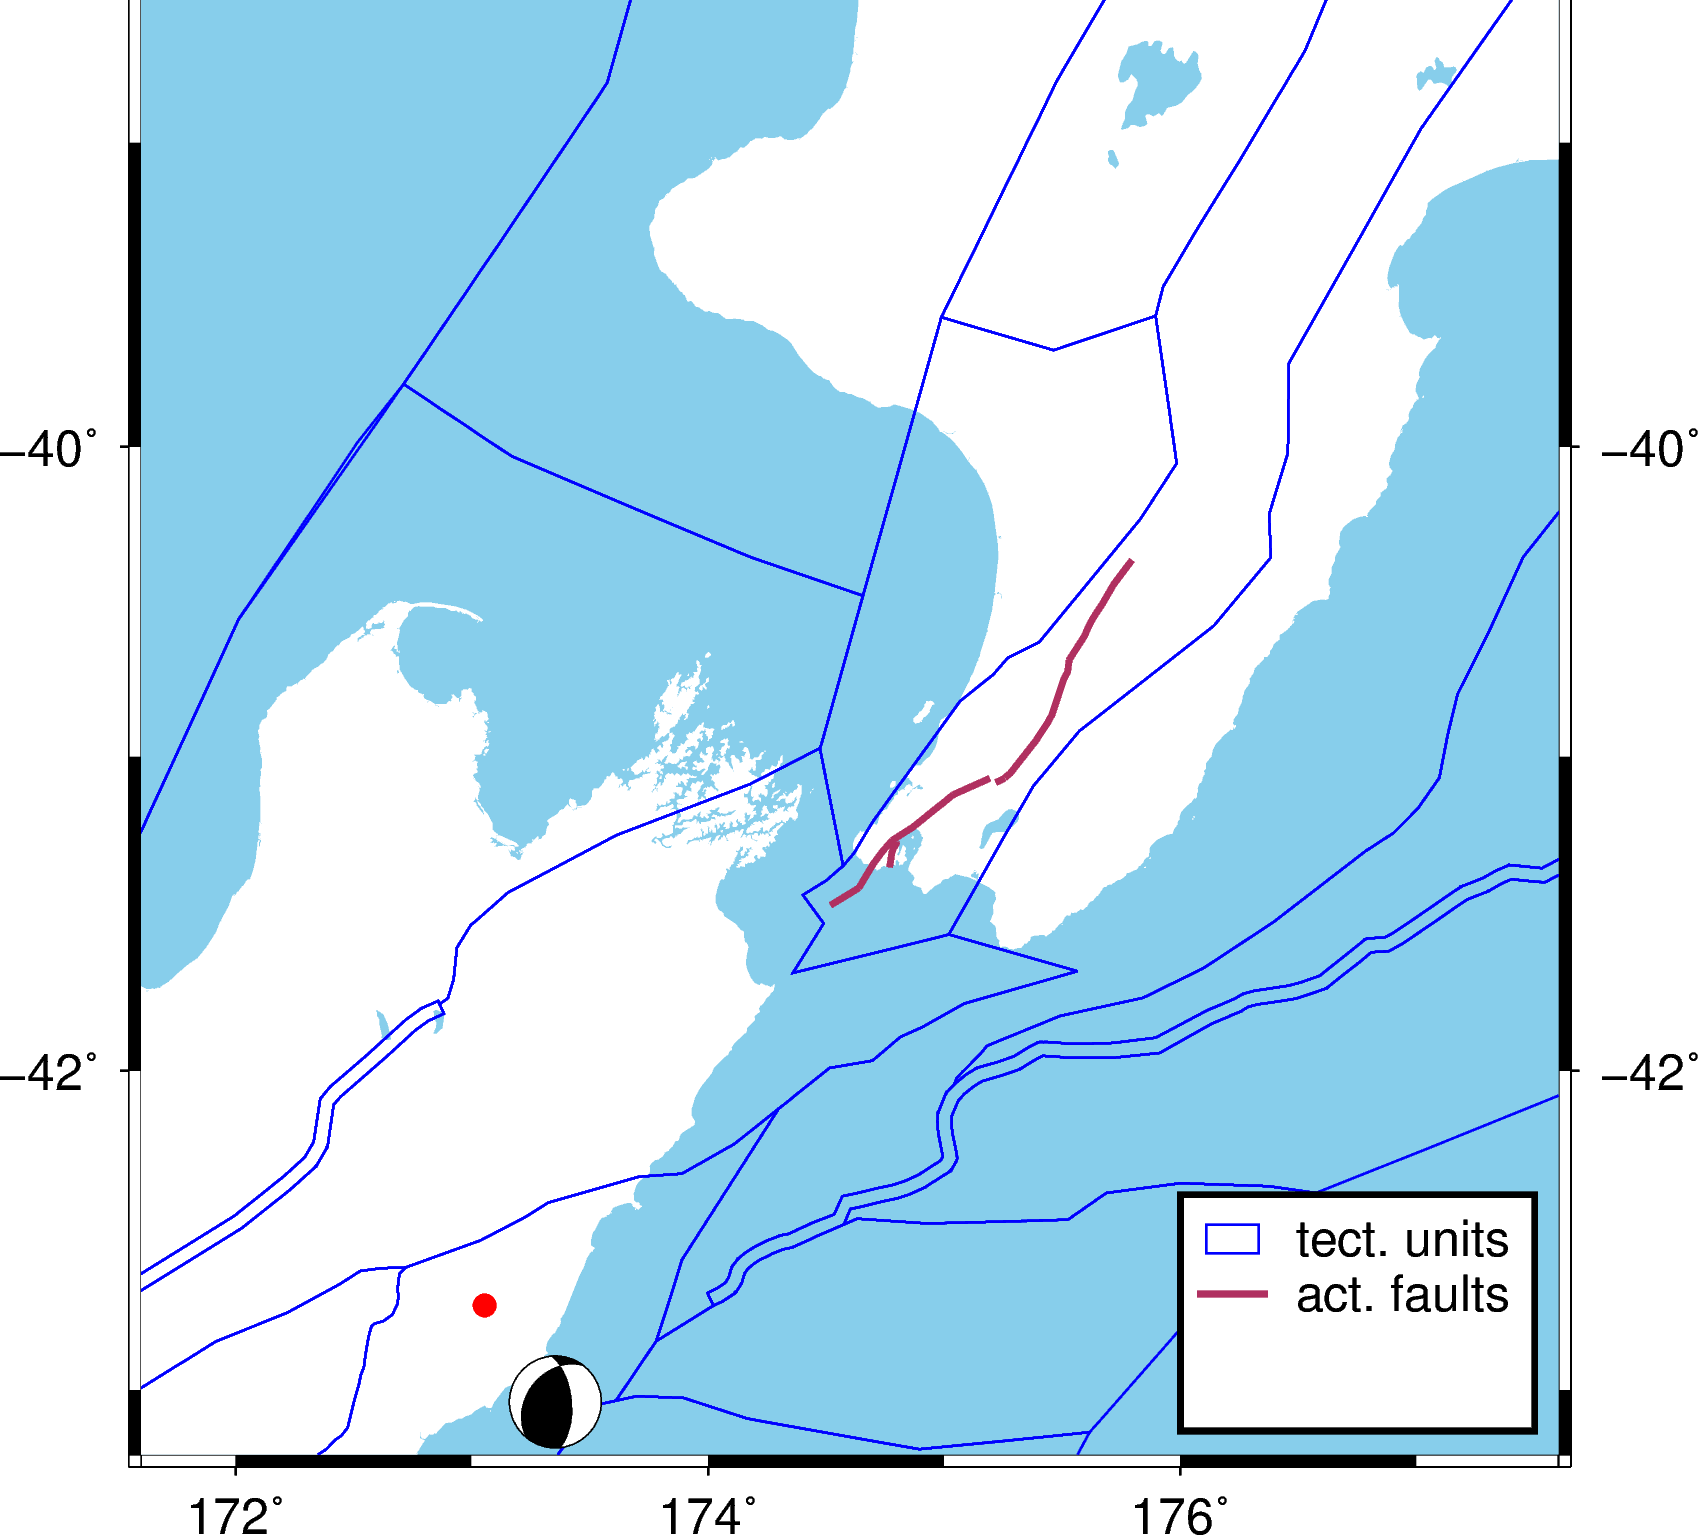

In [324]:
fig = pygmt.Figure()

fig.basemap(region=region_map, projection="M12c", frame="afg")
fig.coast(land="white", water="skyblue")
# 
# fig.grdimage(grid=topo_data, region=region_map,cmap='oleron')


# plot SHP file: active faults and community
fig.plot(data=gd_dom,pen='0.5p,blue',label='tect. units')
fig.plot(data = gdf_well2,pen='1.5p,maroon',label='act. faults')

fig.meca(focal_mechanism, scale="0.5c", longitude=locat[1]+0.3, latitude=locat[0]-0.3, depth=15.1) # plot focal mechanism
fig.plot(x=locat[1], y=locat[0], style="c0.2c",color='red') # plot focal mechanism

# # fig.plot(x=lon, y=lat, style="t0.5c", color='red',label='Stations') # plot stations
# # fig.text(x=lon, y=lat-0.2, text=sta, font=font) # plot station names

fig.plot(data=faultShp)

fig.legend(position = 'jBR+jMR+o0.2c/1.2c+w3c/2c', box='+gwhite+p1.5p,black')
# fig.colorbar(position="JMR+o1.3c/0c+w7c/0.5c+v",frame=["a2000","x+lElevation", "y+lm"]) # position="x12.5c/6.6c+w6c+jTC+v"


fig.show()

outname = '/Users/duoli/Documents/NSHM_SRM/Geometry/' + 'geomap_WEL.png'
fig.savefig(outname)

In [196]:
topo_data = '@earth_relief_01s'

region_map = np.asarray([locat[1]-1,locat[1]+1,locat[0]-1,locat[0]+1])
print(region_map)

[172.054 174.054 -43.737 -41.737]


/var/folders/w1/_6wbwxqn58j2p6t9v4n73wcr0000gn/T/ipykernel_6729/1163383004.py:14: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=locat[1], y=locat[0], style="c0.2c",color='red') # plot focal mechanism


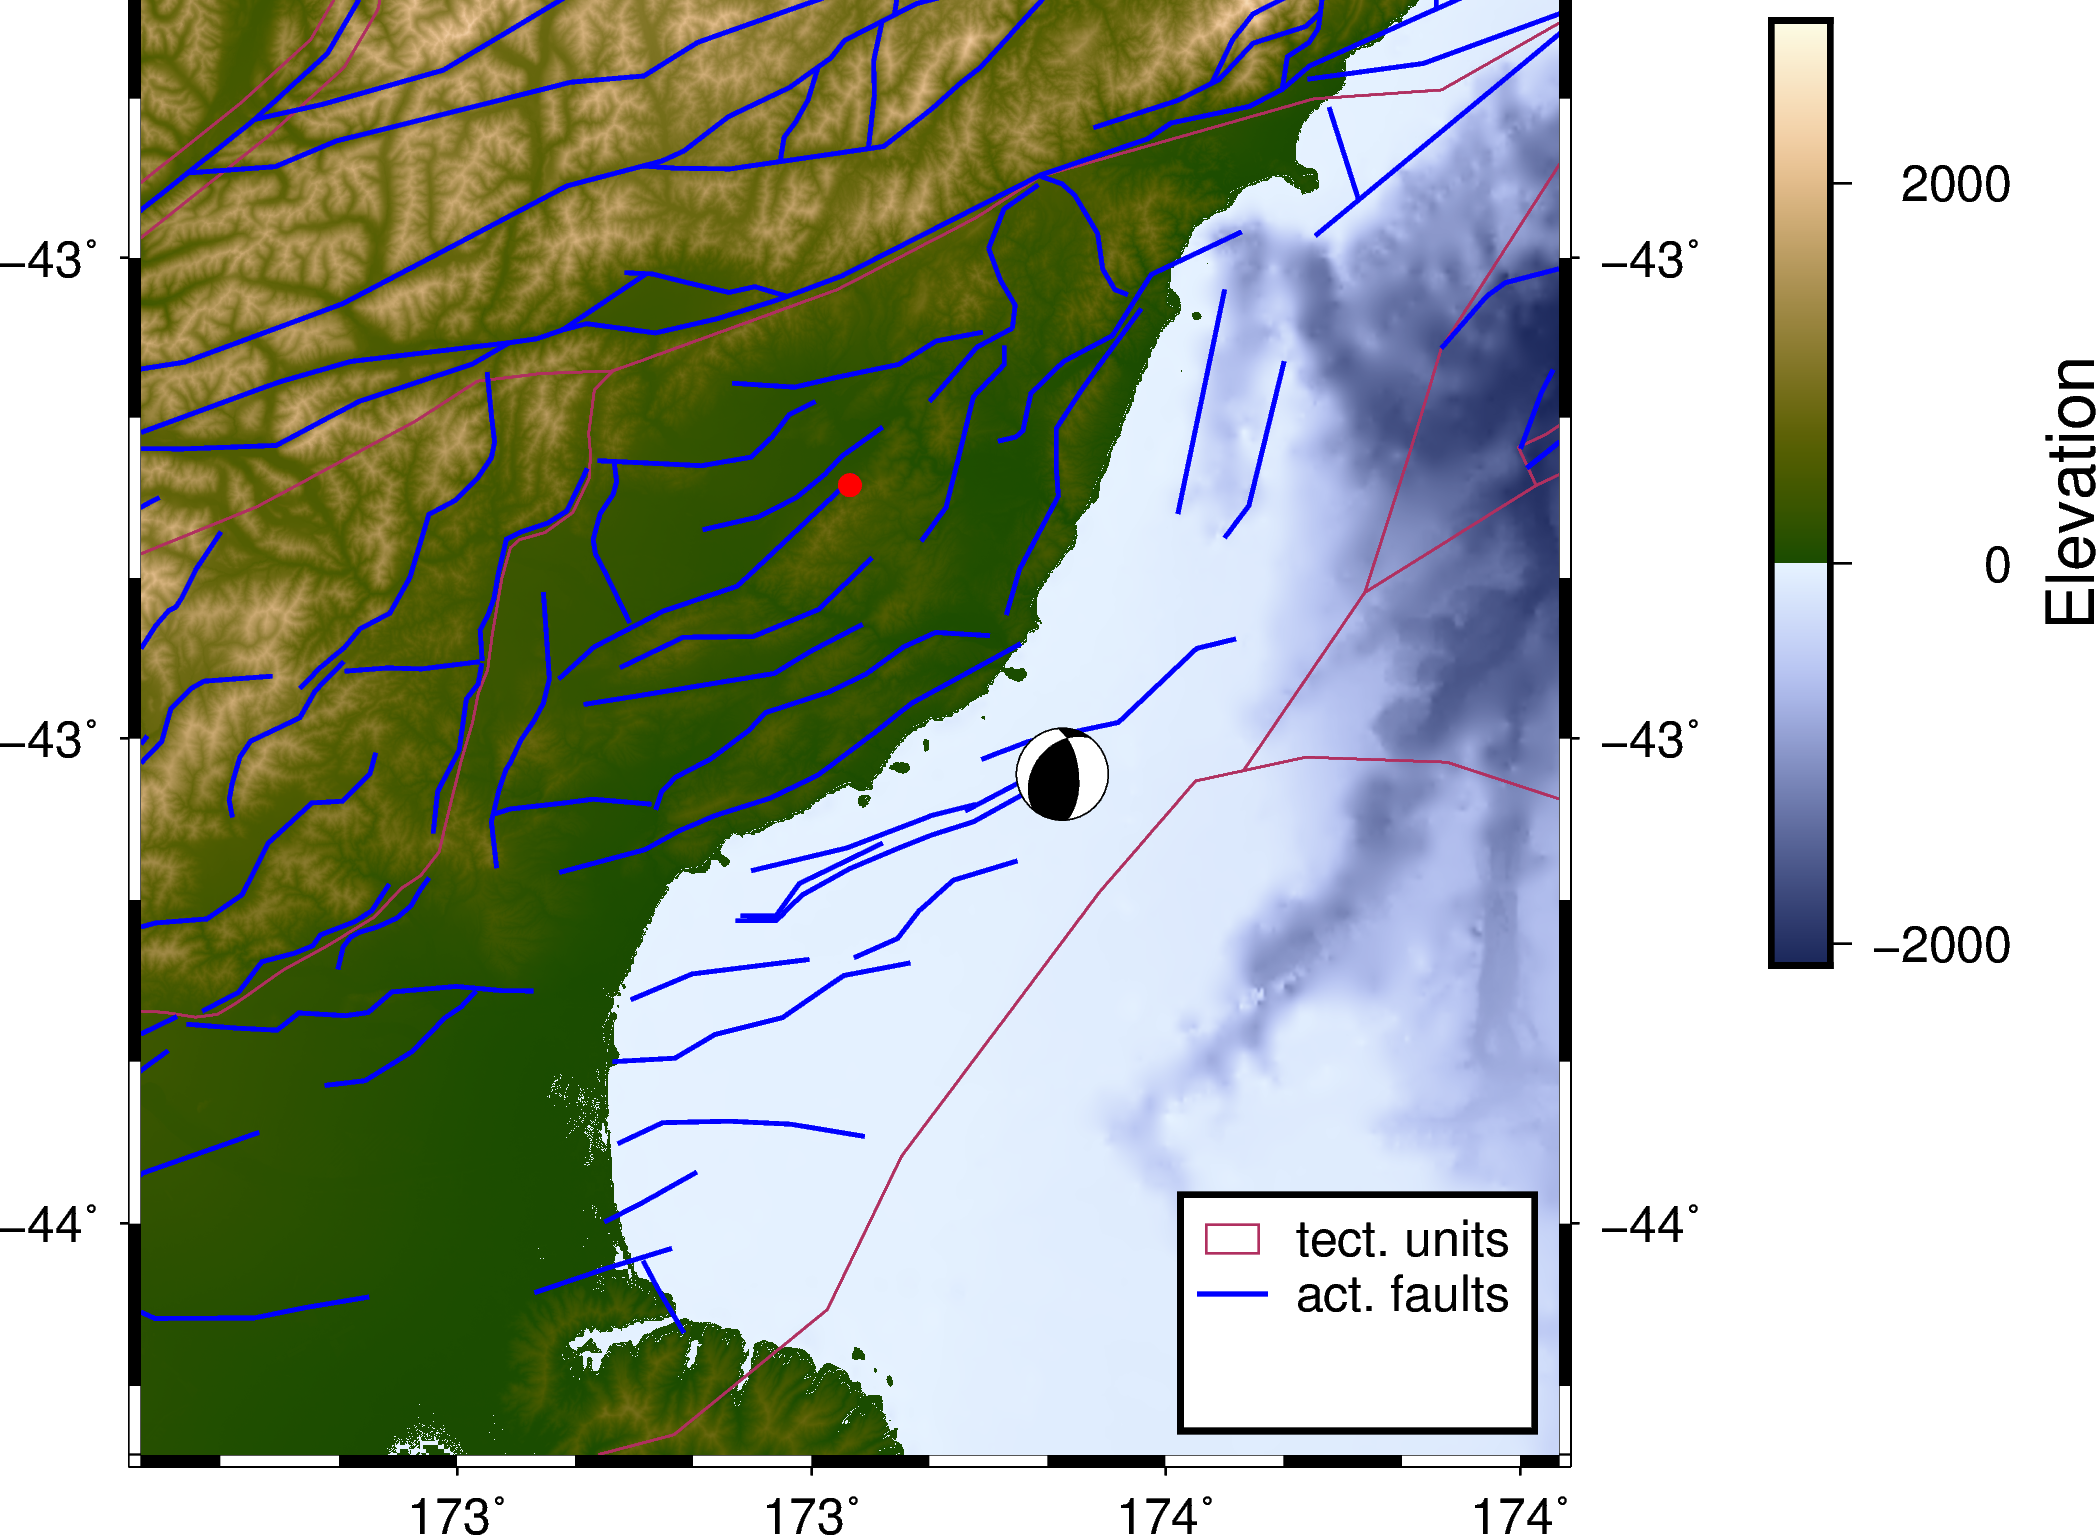

In [198]:
fig = pygmt.Figure()

fig.basemap(region=region_map, projection="M12c", frame="afg")
fig.coast(land="white", water="skyblue")
# 
fig.grdimage(grid=topo_data, region=region_map,cmap='oleron')


# plot SHP file: active faults and community
fig.plot(data=gd_dom,pen='0.5p,maroon',label='tect. units')
fig.plot(data = gdf,label='act. faults',pen='1.0p,blue')

fig.meca(focal_mechanism, scale="0.5c", longitude=locat[1]+0.3, latitude=locat[0]-0.3, depth=15.1) # plot focal mechanism
fig.plot(x=locat[1], y=locat[0], style="c0.2c",color='red') # plot focal mechanism

# # fig.plot(x=lon, y=lat, style="t0.5c", color='red',label='Stations') # plot stations
# # fig.text(x=lon, y=lat-0.2, text=sta, font=font) # plot station names

fig.plot(data=faultShp)

fig.legend(position = 'jBR+jMR+o0.2c/1.2c+w3c/2c', box='+gwhite+p1.5p,black')
fig.colorbar(position="JMR+o1.8c/0c+w8c/0.5c+v",frame=["a2000","x+lElevation", "y+lm"]) # position="x12.5c/6.6c+w6c+jTC+v"


fig.show()

outname = '/Users/duoli/Documents/NSHM_SRM/Geometry/' + 'geomap_Kai.png'
fig.savefig(outname)

In [199]:
1410+2115

3525